## Melhor Rota (Taquaritinga > Araraquara)

Esse projeto, que faz parte do rol de estudos de AI que tenho me dedicado diariamente. E o objetivo é construir agentes baseados em metas, estes que cosneguem planejar com antecedência a solução de problemas, no caso, problemas de navegação / problema de localização de rotas. No caso desse, queremos descobrir a melhor rota partindo de Taquaritinga (cidade Natal) até a alguma cidade escolhida.

Para a tal solução, definimos precisaamente os problemas e suas soluções, com a utilização de vários algoritmos de busca com propósito generalizado. 


Para quem não tem tanta familiaridade, os algoritmos de busca são classificados em dois tipos:

- Algoritmos de Busca Sem Informação: exploram o espaço de pesquisa sem ter qualquer informação sobre o problema, apenas a sua definição
Exemplos: Breadth First Search, Depth First Search, Depth Limited Search, Iterative Deepening Search, Uniform Cost Search e outros mais.

- Algoritmos de Busca com Informação: esses algoritmos alavancam qualquer informação (heurística) sobre o problema de busca, através do espaço de busca para encontrar a solução de maneira eficiente.
Exemplos: Best First Search, A\* Search, Recursive Best First Search

### Bibliotecas e Componentes

In [1]:
# Importando componentes com as funções
from search import *
from utils import *

# Bibliotecas
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time


#### Consultando as funções da classe Problem()

In [2]:
%psource Problem

class Problem(object):

    """A classe abstrata para um problema formal. Você deve implementar subclasse
     para os métodos ações e resultados, e possivelmente
     __init__, goal_test e path_cost. Em seguida, você cria instâncias
     da sua subclasse e então resolve os problemas com as várias funções de busca."""

    def __init__(self, initial, goal=None):
        """O construtor especifica o estado inicial e possivelmente um esdado objetivo, 
         se houver uma meta única. O construtor da sua subclasse pode adicionar
         outros argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retornar as ações que podem ser executadas no dado
         estado. O resultado normalmente seria uma lista, mas se houver
         muitas ações, considere levá-las de uma em uma
         iteração, ao invés de construí-los todos de uma vez."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna o 

#### Consultando as funções da clase GraphProblem

In [3]:
%psource GraphProblem

class GraphProblem(Problem):

    "The problem of searching a graph from one node to another."

    def __init__(self, initial, goal, graph):
        Problem.__init__(self, initial, goal)
        self.graph = graph

    def actions(self, A):
        "The actions at a graph node are just its neighbors."
        return list(self.graph.get(A).keys())

    def result(self, state, action):
        "The result of going to a neighbor is just that neighbor."
        return action

    def path_cost(self, cost_so_far, A, action, B):
        return cost_so_far + (self.graph.get(A, B) or infinity)

    def h(self, node):
        "h function is straight-line distance from a node's state to goal."
        locs = getattr(self.graph, 'locations', None)
        if locs:
            return int(distance(locs[node.state], locs[self.goal]))
        else:
            return infinity


## Definindo o Problema

Definir o problema é o primeiro passo, pois com isso conseguimos descobrir o estado objetivo, partindo de um estado inicial, que será definido no grafo abaixo. Note que criamos dicionários com as distâncias e localizações geográficas das cidades.

*as informações não são milimetricamente precisas, pois são para fins de aprendizado.

In [4]:
# Distância entre as cidades e suas vizinhas mais próximas
sp_interior_map = UndirectedGraph(dict(
    Taquaritinga=dict(Jaboticabal=30, Matão=25, MonteAlto=28, SantaAdélia=35),  
    Jaboticabal=dict(Taquaritinga=30, Bebedouro=43, MonteAzulPaulista=20),
    Bebedouro=dict(Jaboticabal=43, Barretos=35, Colina=27),
    Barretos=dict(Bebedouro=35, Colina=25, Olímpia=30),
    Colina=dict(Barretos=25, Bebedouro=27, Jaborandi=30),
    Olímpia=dict(Barretos=30, Guaraci=25, SãoJosédoRioPreto=50),
    SãoJosédoRioPreto=dict(Olímpia=50, Catanduva=45),
    Catanduva=dict(SãoJosédoRioPreto=45, SantaAdélia=40),
    SantaAdélia=dict(Taquaritinga=35, Catanduva=40, Itajobi=25),
    Itajobi=dict(SantaAdélia=25, Taquaritinga=30),
    MonteAlto=dict(Taquaritinga=28, Jaboticabal=34, VistaAlegredoAlto=20),
    VistaAlegredoAlto=dict(MonteAlto=20, Taquaritinga=25),
    Matão=dict(Taquaritinga=25, Araraquara=26, Itápolis=30),
    Itápolis=dict(Matão=30, Bebedouro=35),
    Igarapava=dict(Restinga=38, Pedregulho=35),
    Restinga=dict(Igarapava=38, Franca=22),
    Franca=dict(Restinga=22, Batatais=45),
    Batatais=dict(Franca=45, RibeiraoPreto=35),
    RibeiraoPreto=dict(Batatais=35, Sertaozinho=20),
    Sertaozinho=dict(RibeiraoPreto=20, Pontal=20),
    Pontal=dict(Sertaozinho=20, RibeiraoPreto=40)
))

# Localizações dentro do mapa
sp_interior_map.locations = dict(
    Taquaritinga=(100, 400),
    Jaboticabal=(130, 370),
    Bebedouro=(160, 260),
    Barretos=(250, 200),
    Colina=(230, 180),
    Olímpia=(260, 220),
    SãoJosédoRioPreto=(270, 230),
    Catanduva=(120, 420),
    SantaAdélia=(110, 410),
    Itajobi=(130, 430),
    Jaborandi=(206, 484),
    MonteAzulPaulista=(209, 486),
    Guaraci=(209, 489),
    MonteAlto=(120, 390),
    Araraquara=(217, 481),
    Pedregulho=(202, 474),
    VistaAlegredoAlto=(130, 380),
    Matão=(150, 440),
    Itápolis=(160, 450),
    Igarapava=(450, 620),
    Restinga=(420, 580),
    Franca=(400, 600),
    Batatais=(370, 550),
    RibeiraoPreto=(300, 350),
    Sertaozinho=(280, 340),
    Pontal=(310, 320)
)

Caso você não tenha entendido a lógica, pegamos o primeiro nó (Taquaritinga) com suas quatro cidades vizinhas (Jaboticabal, Monte Alto, Matão e Santa Adélia) e essas recebem a distância em unidades (seja qualquer uma, mas no caso KM) da primeira. Nesse projeto, é utilizada a distância em linha reta.


In [5]:
# Nó inicial e nó destino
sp_interior_problem = GraphProblem('Taquaritinga', 'Araraquara', sp_interior_map)

## Visualizando uma amostra do mapa do interior do estado de São Paulo

In [6]:
# Aramazenando as localizações em uma variável
sp_interior_locations = sp_interior_map.locations
print(sp_interior_locations)

{'Taquaritinga': (100, 400), 'Jaboticabal': (130, 370), 'Bebedouro': (160, 260), 'Barretos': (250, 200), 'Colina': (230, 180), 'Olímpia': (260, 220), 'SãoJosédoRioPreto': (270, 230), 'Catanduva': (120, 420), 'SantaAdélia': (110, 410), 'Itajobi': (130, 430), 'Jaborandi': (206, 484), 'MonteAzulPaulista': (209, 486), 'Guaraci': (209, 489), 'MonteAlto': (120, 390), 'Araraquara': (217, 481), 'Pedregulho': (202, 474), 'VistaAlegredoAlto': (130, 380), 'Matão': (150, 440), 'Itápolis': (160, 450), 'Igarapava': (450, 620), 'Restinga': (420, 580), 'Franca': (400, 600), 'Batatais': (370, 550), 'RibeiraoPreto': (300, 350), 'Sertaozinho': (280, 340), 'Pontal': (310, 320)}


Nesse código, usamos networkx e matplotlib para exibir o mapa e usamos ipywidgets para interagir com o mapa para ver como funciona o algoritmo de busca. Começamoos com o gráfico vazio e adicionaremos nós. Além disso, adicionaremos bordas para o gráfico.

In [7]:
# Inicialização do Gráfico
G = nx.Graph()

# Dicionário de labels para rotular nós no mapa
node_labels = dict()

# Dicionário de cores que são modificados de acordo com a exploração do gráfico
node_colors = dict()

# Percorrendo o mapa e atribuindo labels
for n, p in sp_interior_locations.items():
    G.add_node(n)  # adiciona o nó ao grafo
    node_labels[n] = n   # atribui ao rótulo o seu próprio nome 
    node_colors[n] = "white"  # cor inicial

# Salvamos as cores do nó inicial em um dicionário (branco)
initial_node_colors = dict(node_colors)
    
# Definimos as posições para rótulos de nó, ajustando a posição para 10 unidades abaixo para evitar sobreposições
node_label_pos = {k:[v[0],v[1]-10] for k,v in sp_interior_locations.items()}

# Dicionário que será preenchido com as labels das arestas
edge_labels = dict()

# Adicionamos bordas entre cidades no mapa (função UndirectedGraph definido em search.py)
for node in sp_interior_map.nodes():
    connections = sp_interior_map.get(node)
    for connection in connections.keys():
        distance = connections[connection]
        G.add_edge(node, connection)
        edge_labels[(node, connection)] = distance

## Configurando o gráfico

In [8]:
def show_map(node_colors):
    
    # Tamanho do gráfico
    plt.figure(figsize=(18,13))

    # Construção do gráfico
    # nx.Graph() é o objeto do grafo criado
    # Definimos as posições dos nós (sp_interior_locations)
    # Criamos um loop para percorrer cada nó e definir a sua cor
    nx.draw(G, pos = sp_interior_locations, node_color = [node_colors[node] for node in G.nodes()])

    # Aqui adicionamos os rótulos aos nós, de acordo com as posições evitando sobreposições 
    node_label_handles = nx.draw_networkx_labels(G, pos = node_label_pos, labels = node_labels, font_size = 14)
    
    # Adicionando fundo branco aos rótulos
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # Exibe informaçõpes nas arestas do grafo (Ex: distâncias)
    nx.draw_networkx_edge_labels(G, pos = sp_interior_locations, edge_labels=edge_labels, font_size = 14)
    
    # Legendas
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="gray")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle),
               ('Não Explorado', 'Fronteira', 'Explorando neste momento', 'Explorado'),
               numpoints=1,prop={'size':16}, loc=(.8,.75))
    
    plt.show()

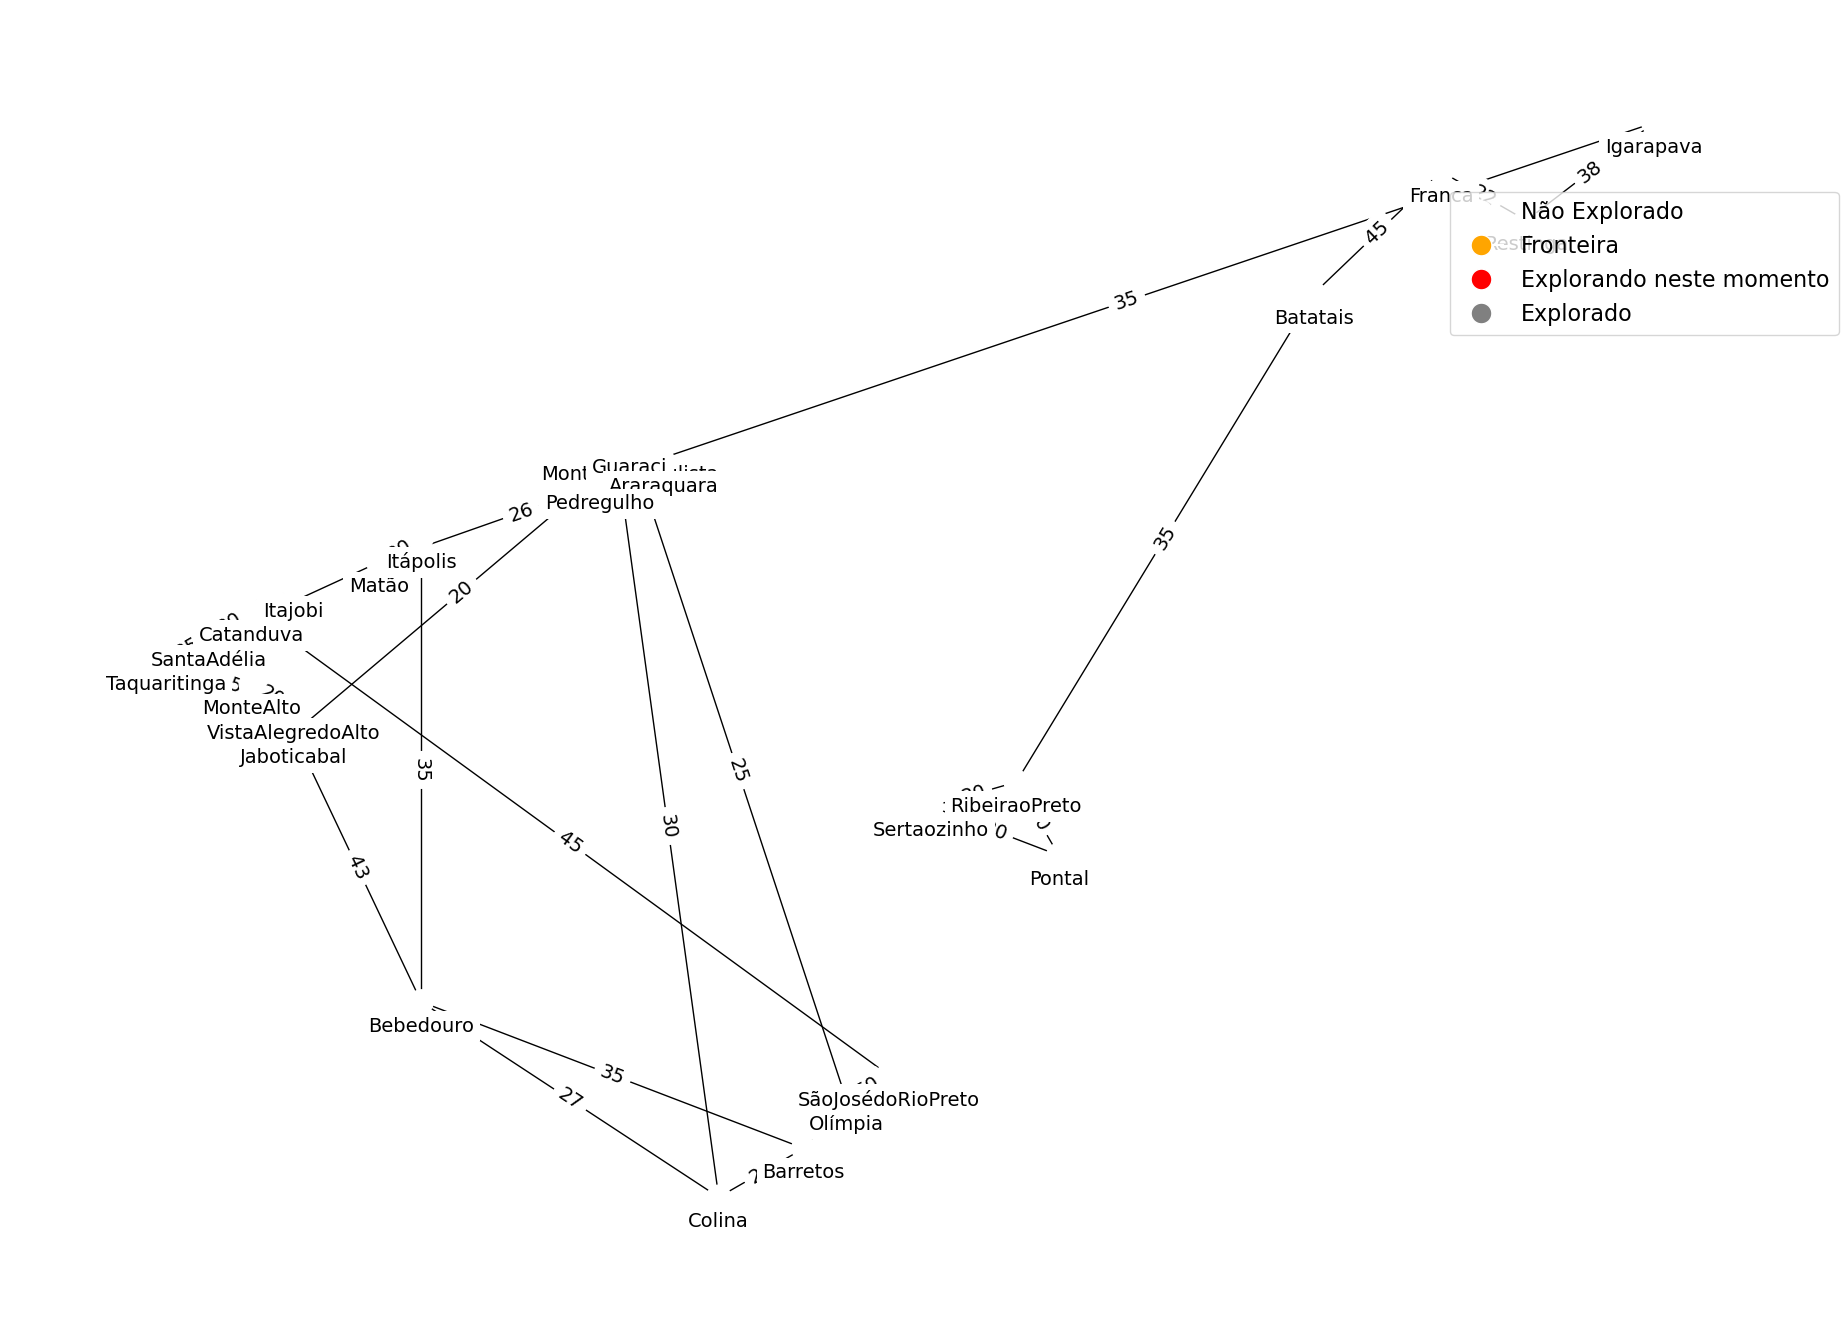

Mapa criado com sucesso!


In [9]:
show_map(node_colors)
print('Mapa criado com sucesso!')

## Visualizando Algoritmos de Busca

Usaremos variações de algoritmos de busca, na sequência:

1. Breadth First Tree Search 
2. Breadth First Search 
3. Uniform Cost Search 
4. A\*-Search 

#### Definindo as cores dos status

* Nós Não Explorados - <font color='black'>white</font>
* Nós Fronteira - <font color='orange'>orange</font>
* Nós Sendo Explorados Neste Momento - <font color='red'>red</font>
* Nós já Explorados - <font color='gray'>gray</font>

Nesse bloco, utilizamos os widgets interativos do Jupyter para que através dp sistema de visualização de algoritmos de busca em grafos. Isso permite que o usuário escolha um algoritmo de busca.

In [10]:
# Função para dar destaque ao caminho final encontrado
def final_path_colors(problem, solution):
    "Retorna um node_colors dict do caminho final do problema até a solução"
    
    final_colors = dict(initial_node_colors)  # estado inicial das cores
    final_colors[problem.initial] = "green"  # deixa o estado inicial de verde
    for node in solution:
        final_colors[node] = "green"   # pinta todos os nós da solução de verde
    return final_colors

# Função para exibir a interface interativa (como a visualização será feita)
# Sintaxe: booleano que define se o usuário por interagir ou não; algoritmo a ser usado; problema a ser resolvido
def display_visual(user_input, algorithm=None, problem=None):
    # Execução automática caso for false 
    # Essa execução gerencia a visualização do grafo sem permitir a escolha manual
    if user_input == False:
        # Slider
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        # Callback para execução do algoritmo (quando um botão for ativado)
        def visualize_callback(Visualize):
            if Visualize is True:
                # False por padrão para garantir que o botão possa ser clicado após a execução
                button.value = False
                
                global all_node_colors  # armazena os estados do grafo
                
                iterations, all_node_colors, node = algorithm(problem)  # chama o alforitmo de solução de problemas
                solution = node.solution()  # retorna uma sequência de nós
                all_node_colors.append(final_path_colors(problem, solution))  # gera um dicionário de todos os nós verdes
                
                slider.max = len(all_node_colors) - 1  # atualizamos o limite máximo do slider para corresponder ao total de iterações (permitindo percorrer todas as etapas)
                
                # Percorrendo todas as iterações
                for i in range(slider.max + 1):
                    slider.value = i
        
        # Criamos um slider iterativo
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        # Botão para iniciar o algoritmo
        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
    
    # Criamos um dropdwon que permite ao usuário escolher o algoritmo de busca
    if user_input == True:
        node_colors = dict(initial_node_colors)
        if algorithm == None:
            algorithms = {"Breadth First Tree Search": breadth_first_tree_search, "Breadth First Search": breadth_first_search, "Uniform Cost Search": uniform_cost_search, "A-star Search": astar_search}
            algo_dropdown = widgets.Dropdown(description = "Search algorithm: ", options = sorted(list(algorithms.keys())), value = "Breadth First Tree Search")
            display(algo_dropdown)
        
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
            
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                problem = GraphProblem(start_dropdown.value, end_dropdown.value, sp_interior_map)
                global all_node_colors
                
                if algorithm == None:
                    user_algorithm = algorithms[algo_dropdown.value]
            
                
                iterations, all_node_colors, node = user_algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))

                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
        
        # Dropdown para selecionar a cidade de origem
        start_dropdown = widgets.Dropdown(description = "Start city: ", options = sorted(list(node_colors.keys())), value = "Taquaritinga")
        display(start_dropdown)

        # Dropdown para selecionar a cidade de destino
        end_dropdown = widgets.Dropdown(description = "Goal city: ", options = sorted(list(node_colors.keys())), value = "Araraquara")
        display(end_dropdown)
        
        # Botão para inicializar
        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
        
        # Slider para cada etapa
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)
        

## Busca em Largura - Breadth-First Tree Search (BFTS) - BFS modificado

É um algoritmo de busca em grafos que explora primeiro os nós mais próximos do nó inicial, expandindo-os de maneira nivelada, ou seja, visitando todos os nós de uma profundidade antes de avançar para a próxima.

Suas vantagens:
- Sempre encontra uma ótima solução se o custo das arestas for uniforme
- Boa escolha para problemas com soluções próximas ao nó inicial

Suas desvantagens:
- Consome muita memória
- Não funciona tão bem para espaços de busca muito grandes

In [11]:
# Faz busca em árvore (recebe problema e fronteira)
def tree_search(problem, frontier):
    """Procure através dos sucessores de um problema para encontrar uma meta.
     A fronteira do argumento deve ser uma fila vazia.
     Não se preocupe com caminhos repetidos para um estado. """
    
    # Essa parte já foi explicada anteriormente
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    # Adicionando o nó inicial à fronteira
    frontier.append(Node(problem.initial))
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    # Enquanto houver nós na fronteira o loop continu
    while frontier:
        node = frontier.pop()  # remove o próximo nó da fronteira
        
        node_colors[node.state] = "red"  # sendo explorado
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        # Teste de objetivo (verifica se o atual é o objetivo)
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"   # foi encontrado
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        # Expande o nó atual e adiciona seus sucessores à fronteira
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"  # indica que está na fronteira
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # Marca o nós atual como Explorado
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

# Função de execução
def breadth_first_tree_search(problem):
    "Pesquise primeiro os nós mais rasos na árvore de pesquisa."
    # Chama tree_search com o problem e uma fila FIFO (FIFOQueue()) para garantir que os nós mais rasos sejam explorados primeiro
    iterations, all_node_colors, node = tree_search(problem, FIFOQueue())
    return(iterations, all_node_colors, node)

Através do uso do ipywidgets, exibimos um controle deslizante, um botão e nosso o mapa com as cidades selecionadas. Ao deslizar o controle  conseguimos visualizar todos os passos intermediários que o algoritmo de pesquisa realiza.

No código abaixo inicializa uma lista para armazenar o histórico de cores dos nós, definimos o problema entre 2 cidades e invocamos o algoritmo.

In [12]:
all_node_colors = []
sp_interior_problem = GraphProblem('Taquaritinga', 'Araraquara', sp_interior_map)
display_visual(user_input = False, algorithm = breadth_first_tree_search, problem = sp_interior_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## Busca em Largura - Breadth-First Search (BFS)

Um algoritmo que explora os nós de maneira nivelada, ou seja, visita todos os nós de um nível antes de avançar para o próximo nível.

Vantagens:
- sempre encontra uma solução caso ela exista
- explora todos os nós no nível antes de passar para o próximo
- simplicidade
- ideal para grafos menores

Desvantagens:
- Alto consumo de memória
- Não ideal para grafos muito grandes
- Desconsidera custos de arestas
- Revisita estados


In [13]:
# Definição do breadth_first_search que recebe o problema 
def breadth_first_search(problem):
    
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    # verifica se o nó inicial é o objetivo
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    # Iniciando a fronteira como uma fila (FIFO)
    frontier = FIFOQueue()
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    
    # Enquanto houver nós na fronteira o loop continua
    while frontier:
        node = frontier.pop()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        # Expandimos o nó atual e verificamos se o filho não foi explorado e não está na fronteira
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                # Caso não tenha sido explorado, adicionamos o filho e pintamos de laranja
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [14]:
all_node_colors = []
sp_interior_problem = GraphProblem('Taquaritinga', 'Igarapava', sp_interior_map)
display_visual(user_input = False, algorithm = breadth_first_search, problem = sp_interior_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## Busca de Custo Uniforme - Uniform-Cost Search (UCS)

Algoritmo que expande o nó com o menor custo acumulado primeiro. Diferente da Busca em Largura (BFS), que trata todas as arestas como tendo o mesmo custo, a UCS leva em consideração os custos das arestas, garantindo que a solução encontrada seja a de menor custo total.

Vantagens:
- Ótimos grafos ponderados
- Sempre encontra solução
- Flexibilidade
- Evita ciclos

Desvantagens:
- Alto consumo de memória
- Complexidade de tempo
- Desempemnho depende da função de custo
- Não indicado para problemas de cusos negativos

In [15]:
# Função que realiza uma busca informada, onde a ordem de expansão dos nós é determinada pela função f
def best_first_graph_search(problem, f):
    """Pesquise primeiro os nós com as pontuações f mais baixas.
    Você especifica a função f (nó) que você deseja minimizar; por exemplo,
    se f é uma estimativa heurística para a meta, então temos a melhor pesquisa gananciosa (greedy); 
    Se f é node.depth então temos breadth-first search.
    Há uma sutileza: a linha "f = memoize (f, 'f')" significa que os valores de f
    serão armazenados em cache nos nós à medida que forem computados. Então, depois de fazer
    uma primeira pesquisa você pode examinar os valores f do caminho de retorno."""
    
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')  # Função que calcula o valor de cada nó, determinando a ordem de expansão
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    # Verificando se o nó inicial é o objetivo
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    # Inicializa a fronteira como uma fila de prioridade (PriorityQueue), onde a prioridade é determinada pela função f
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()

    # Enquanto houver nós na fronteira, o loop continua
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        # Expansão do nó atual / Verifica se o filho não foi explorado e não está na fronteira
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                # Adiciona o filho à fonteira e o pinta de laranja
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            # Se o filho já estiver na fronte3ira, compara o valor de f do filho com o nó na fronteira
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
        # Marca o nó atual como explorador
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

# Execução
def uniform_cost_search(problem):
    iterations, all_node_colors, node = best_first_graph_search(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)

In [16]:
all_node_colors = []
sp_interior_problem = GraphProblem('Taquaritinga', 'Igarapava', sp_interior_map)
display_visual(user_input = False, algorithm = uniform_cost_search, problem = sp_interior_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## A* Search

Algoritmo de busca heurística muito utilizado para encontrar o caminho mais curto em grafos ponderados. Ele combina as vantagens da Busca de Custo Uniforme (UCS) e da Busca Gananciosa (Greedy Search), utilizando uma função de avaliação que leva em conta tanto o custo acumulado quanto uma estimativa heurística do custo até o objetivo.

Vantagens:
- ótimo para grafos ponderados
- sempre encontra solução
- flexível
- heurística para guiar busca

Desvantagens:
- Consumo
- Complexidade
- Inadequado para problemas com heurísticas inadmissíveis
- Implementação complexa

Tudo o que foi implementado anteriormente está nesse código, maiores explicações não são preciso.

In [17]:
def best_first_graph_search(problem, f):

    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def astar_search(problem, h=None):
    """A busca A* é a melhor pesquisa de gráfico com f (n) = g (n) + h (n).
    Você precisa especificar a função h quando você chama a função astar_search, ou
    em sua subclasse de Problemas."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search(problem, lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

In [18]:
all_node_colors = []
sp_interior_problem = GraphProblem('Taquaritinga', 'Barretos', sp_interior_map)
display_visual(user_input = False, algorithm = astar_search, problem = sp_interior_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## Aplicativo de Busca

Aqui é possível escolher o algoritmo de busca, a cidade de origem e a cidade de destino. Acompanhe a interação.

In [19]:
all_node_colors = []
display_visual(user_input = True)

Dropdown(description='Search algorithm: ', index=2, options=('A-star Search', 'Breadth First Search', 'Breadth…

Dropdown(description='Start city: ', index=24, options=('Araraquara', 'Barretos', 'Batatais', 'Bebedouro', 'Ca…

Dropdown(description='Goal city: ', options=('Araraquara', 'Barretos', 'Batatais', 'Bebedouro', 'Catanduva', '…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

## Fim